# Signal Transformations (Continuous)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["font.serif"] = "cmr14"
rcParams['savefig.dpi'] = 300
rcParams["figure.dpi"] = 150
rcParams.update({'font.size': 18})
rcParams['lines.linewidth'] = 2.0
from matplotlib.pyplot import figure, savefig
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import numpy as np
from numpy import linspace

from sympy import oo, Symbol, integrate, exp, Heaviside, plot, sin, cos, Piecewise, printing, lambdify
from sympy.abc import t, x
from sympy.interactive import init_printing
init_printing(pretty_print=True)

## Motivation

**Goal:** analyze the impact of a transformation of the form $e(t) \to e(a t + b)$ on a signal (continuous or discrete) for various positive/negative $a$ and $b$

* $a$ acts as a **scaling on time** ($a > 1$ shrinks the signal plot). Note that negative $a$ leads to a time reversal.
* $b$ acts as **shift on time** ($b > 0$ shifts to the left) 

Relatively straight forward when only one of $a$ or $b$ are present, but some care required when both appear.

### Systematic approach is to consider these as compositions of functions

In [3]:
#define some transform parameters t -> a*t+b
a = 2 # example time scaling
b = 1 # example time shift

# function to scale
e = cos(2*t)+0.5*sin(2*t)+sin(0.5*t)

# compute the shifted function
e_transformed = e.subs(t,a*t+b)

## Transformation Approach #1
* Consider the full transformation $t \to at + b$ as the composition of 2 steps
$ h_1(t) = f_1(g_1(t))$

* Here $f_1(t) = e(t + b)$ (shift by $b$) and $g_1(t) = at$ (scale by $a$) so that $$h_1(t) = f_1(g_1(t)) = f_1(at) = e(at + b)$$ 

* Now consider the transforms of the signal $e(t)$ through these components $f_1$ and $g_1$

In [4]:
# compute the two parts f1 and g1
e_f1 = e.subs(t,t+b)
g1 = a*t
h1 = e_f1.subs(t,g1)

In [5]:
# convert to simplify the plotting of the functions
lam_e = lambdify(t, e, modules=['numpy'])
lam_e_transformed = lambdify(t, e_transformed, modules=['numpy'])
lam_e_f1 = lambdify(t, e_f1, modules=['numpy'])
lam_h1 = lambdify(t, h1, modules=['numpy'])

# time variable for plotting
tt_vals = linspace(-1.5*np.pi, 1.5*np.pi, 1000)

* To manually implement these steps, process is to first shift by $b$ ($f_1$) and then scale by $a$ which is ($g_1$) - including time reversal if $a < 0$  

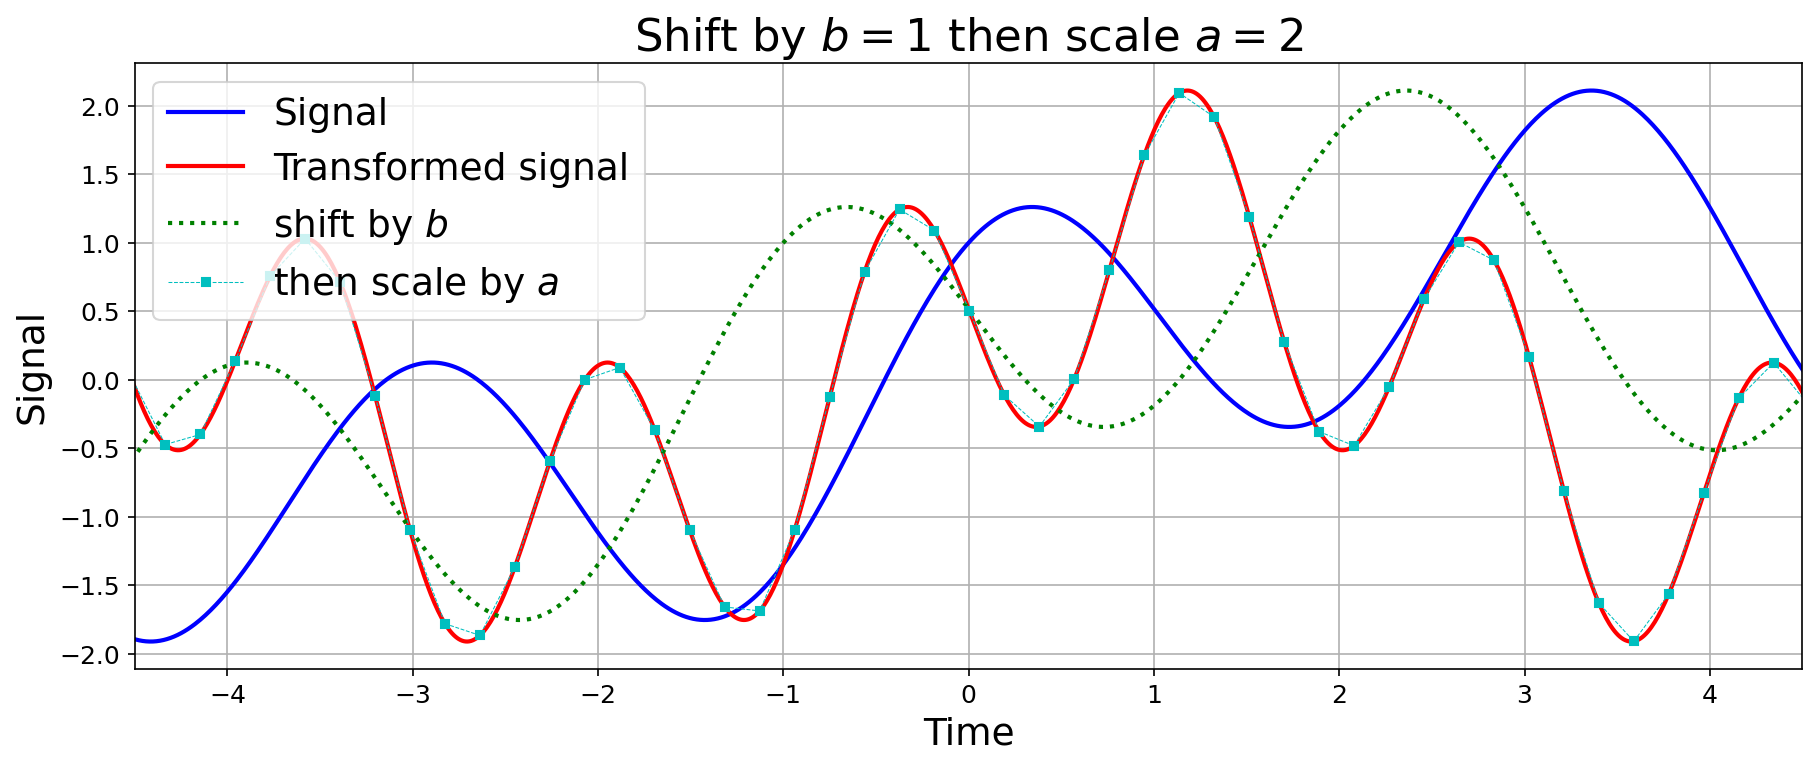

In [6]:
fig = plt.figure(figsize=(12, 5),dpi=150,constrained_layout = True)
plt.plot(tt_vals, lam_e(tt_vals),'b',label='Signal')
plt.plot(tt_vals, lam_e_transformed(tt_vals),'r-',lw=2,label='Transformed signal')
plt.plot(tt_vals, lam_e_f1(tt_vals),'g:',label='shift by $b$')
plt.plot(tt_vals[0::20], lam_h1(tt_vals[0::20]),'cs--',lw=0.5,ms=4,label='then scale by $a$')

plt.ylabel("Signal")
plt.xlabel("Time")
major_xticks = np.arange(-4, 5, 1)
plt.xlim(-4.5,4.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.xticks(major_xticks)
plt.grid(True)
plt.legend()
plt.title('Shift by $b = $'+str(b)+' then scale $a = $'+str(a))
plt.show()

## Transformation Approach #2
* Consider the full transformation as the composition of 2 different steps
$ h_2(t) = f_2(g_2(t))$

* Here $f_2(t) = e(at) $, (so scale by $a$) and $g_2(t) = t+b/a$ (shift by $b/a$) so that 
$$h_2(t) = f_2(t+b/a) = e(a(t + b/a)) = e(at+b)$$ 

* Now consider the transforms of the signal $e(t)$ through these components $f_2$ and then $g_2$

In [7]:
# Evaluate signal for scaled t
e_f2 = e.subs(t,a*t)
g2 = t+b/a
# evaluate the scaled-t signal for shifted time
h2 = e_f2.subs(t,g2)

lam_e_f2 = lambdify(t, e_f2, modules=['numpy'])
lam_h2 = lambdify(t, h2, modules=['numpy'])

* Here $f_2(t) = x(at)$ (scale by $a$) and $g_2(t) = t+b/a$ (shift by $b/a$) so that $h_2(t) = x(a(t + b/a))$. 
* To manually implement, first do $f_2$ and then $g_2$.

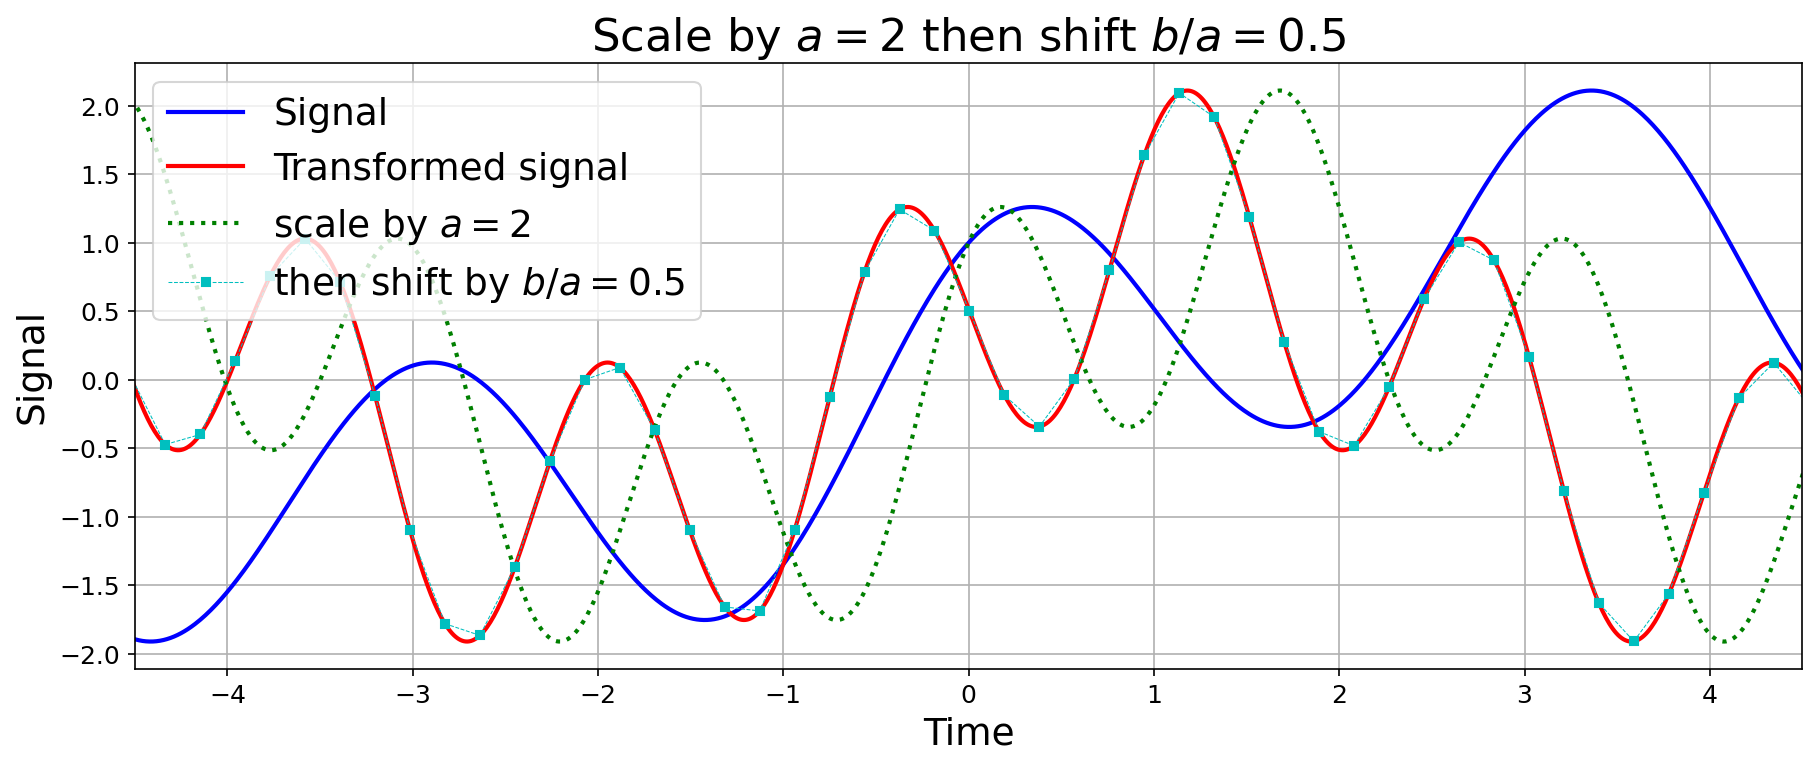

In [8]:
fig = plt.figure(figsize=(12, 5),dpi=150,constrained_layout = True)
plt.plot(tt_vals, lam_e(tt_vals),'b',label='Signal')
plt.plot(tt_vals, lam_e_transformed(tt_vals),'r-',lw=2,label='Transformed signal')

plt.plot(tt_vals, lam_e_f2(tt_vals),'g:',label='scale by $a = $'+str(a))
plt.plot(tt_vals[0::20], lam_h2(tt_vals[0::20]),'cs--',lw=0.5,ms=4,label='then shift by $b/a = $'+str(b/a))
plt.ylabel("Signal")
plt.xlabel("Time")
major_xticks = np.arange(-4, 5, 1)
plt.xlim(-4.5,4.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.xticks(major_xticks)
plt.grid(True)
plt.title('Scale by $a = $'+str(a)+' then shift $b/a = $'+str(b/a))
plt.legend()
plt.show()

## General Form

The most general form of transformation of interest is $$y(t) = Dx(A(t-B)+C)$$ in which case the **order of operations** are 
1. shift by $C$, 
1. scale by $A$, and then
1. shift by $B$. 

Of course $D$ only changes the amplitude.  Clearly we can combine these operations and rewrite this as:
$$
y(t) = Dx(A(t-B + C/A))
$$
with the interpretation of first scale by $A$ then shift by $-B + C/A$) or
$$
y(t) = Dx(At- AB + C)
$$
with the interpretation of first shift by $- AB + C$ and then scale by $A$. **These are all identical**


## Further examples to consider

In [9]:
def shift_and_plot(e, a = 1, b = 0):
    # compute the shifted function
    e_transformed = e.subs(t,a*t+b)
    e_f1 = e.subs(t,t+b)
    g1 = a*t
    h1 = e_f1.subs(t,g1)
    print(h1)

    # convert to simplify the plotting of the functions
    lam_e = lambdify(t, e, modules=['numpy'])
    lam_e_transformed = lambdify(t, e_transformed, modules=['numpy'])
    lam_e_f1 = lambdify(t, e_f1, modules=['numpy'])
    lam_h1 = lambdify(t, h1, modules=['numpy'])
    # time variable for plotting

    fig = plt.figure(figsize=(12, 5),dpi=150,constrained_layout = True)
    plt.plot(tt_vals, lam_e(tt_vals),'b',label='Signal')
    plt.plot(tt_vals, lam_e_transformed(tt_vals),'r-',lw=2,label='Transformed signal')

    plt.plot(tt_vals, lam_e_f1(tt_vals),'g:',label='First shift by $b$')
    plt.plot(tt_vals[0::20], lam_h1(tt_vals[0::20]),'cs--',lw=0.5,ms=4,label='then scale by $a$')
    plt.ylabel("Signal")
    plt.xlabel("Time")
    major_xticks = np.arange(-4, 5, 1)
    plt.xlim(-4.5,4.5)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.xticks(major_xticks)
    plt.grid(True)
    plt.legend()
    plt.title('Shift by $b = $'+str(b)+' then scale $a = $'+str(a))
    plt.show()

## Scale Up

sin(0.25*t) + 0.5*sin(1.0*t) + cos(1.0*t)


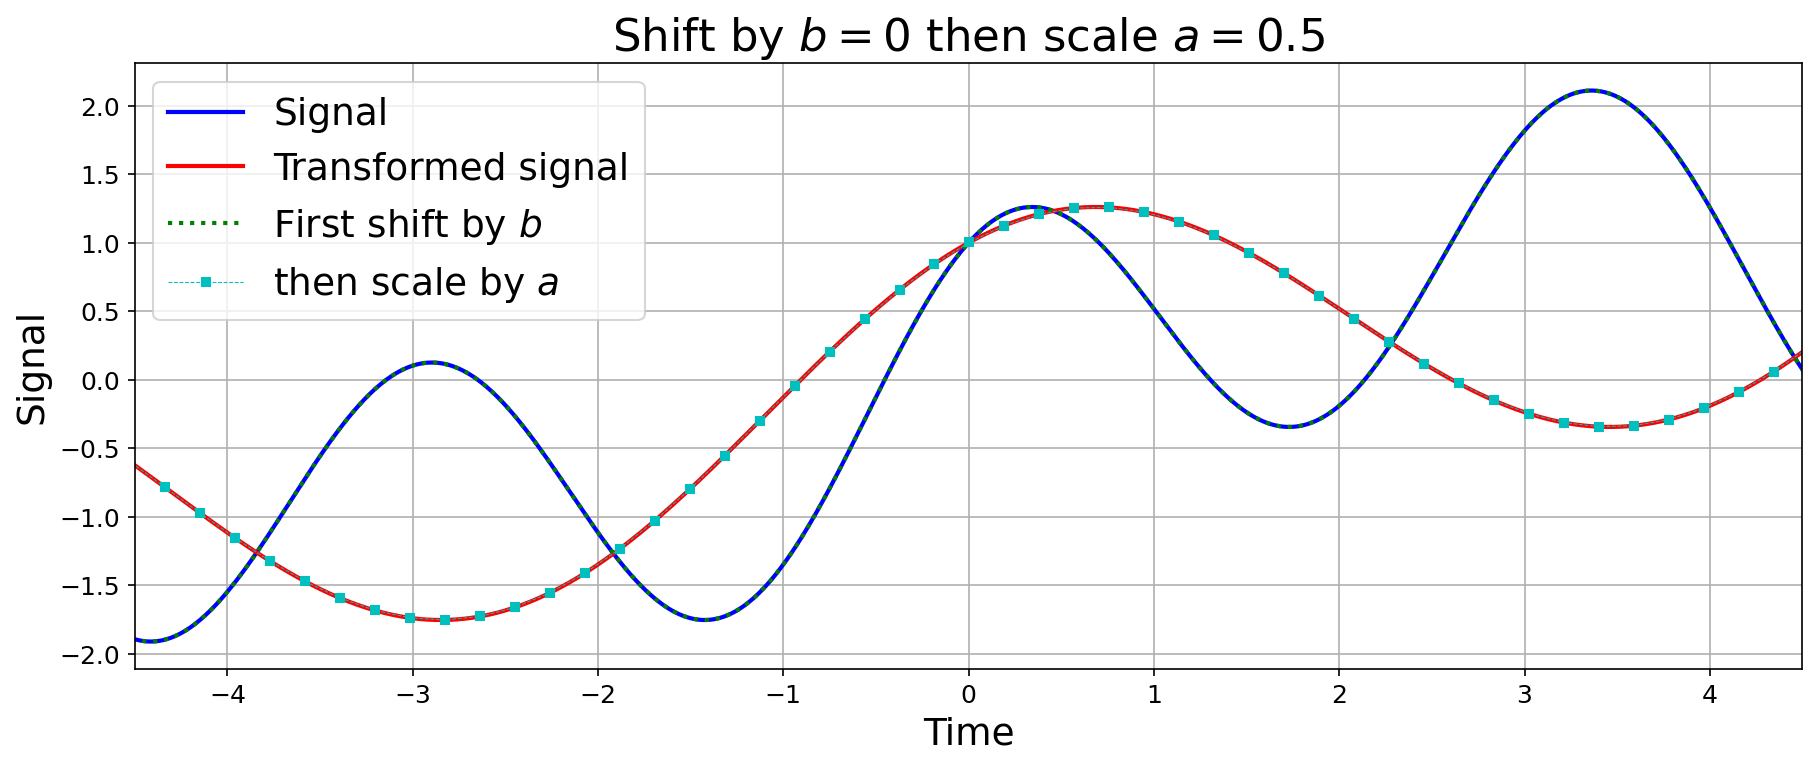

In [10]:
#define some transform parameters t -> a*t+b
a = 0.5 # time scaling
b = 0 # time shift
shift_and_plot(e, a, b)

**Note**: that $a < 1$ expands the signal (dilation)

### Negative Time Shift

sin(0.5*t - 0.5) + 0.5*sin(2*t - 2) + cos(2*t - 2)


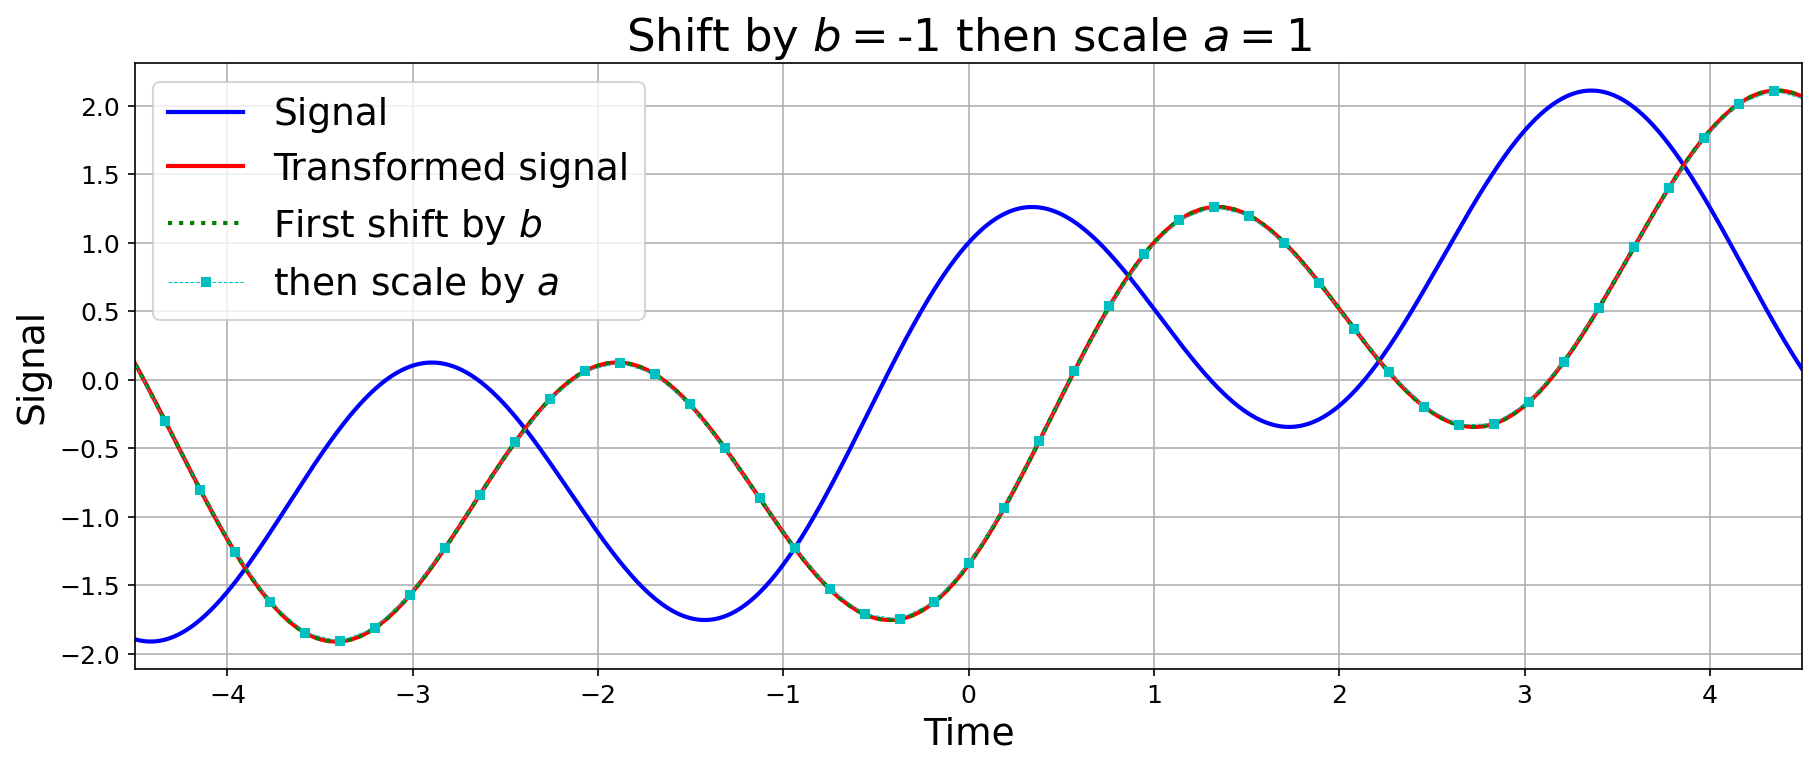

In [11]:
#define some transform parameters t -> a*t+b
a = 1 # time scaling
b = -1 # time shift
shift_and_plot(e, a, b)

**Note**: that $b < 0$ shifts signal to the right ("it happens later")

### Time Reversal

-sin(1.0*t) - 0.5*sin(4*t) + cos(4*t)


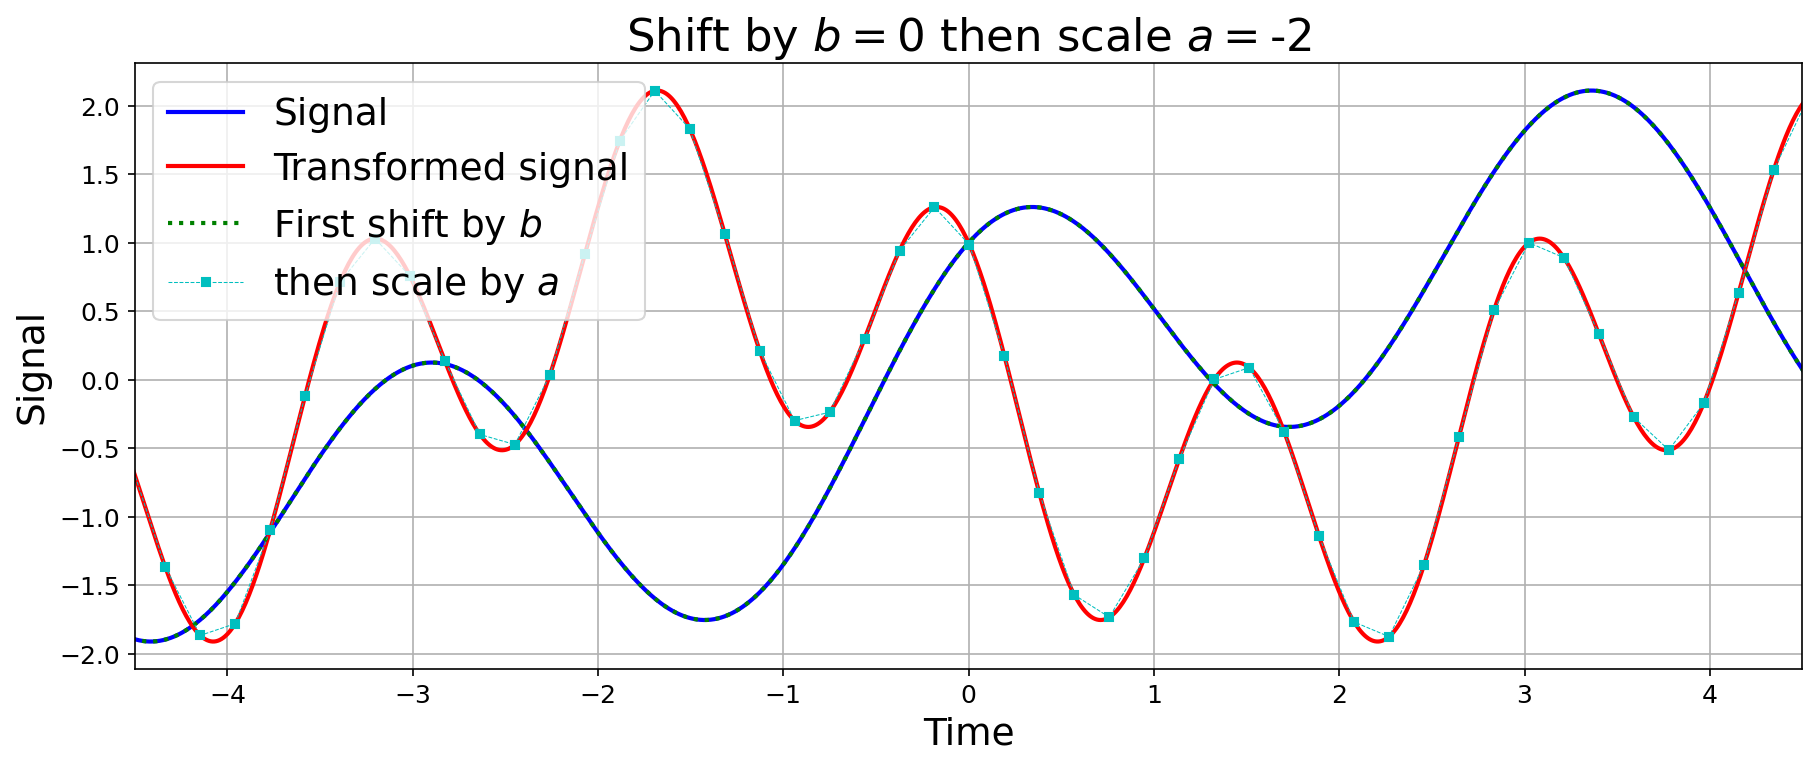

In [12]:
#define some transform parameters t -> a*t+b
a = -2 # time scaling
b = 0 # time shift
shift_and_plot(e, a, b)

**Note**: that $a < 0$ "scales and flips" the signal about the $t = 0$ axis.

## Combining All Negatives

-sin(1.0*t + 0.5) - 0.5*sin(4*t + 2) + cos(4*t + 2)


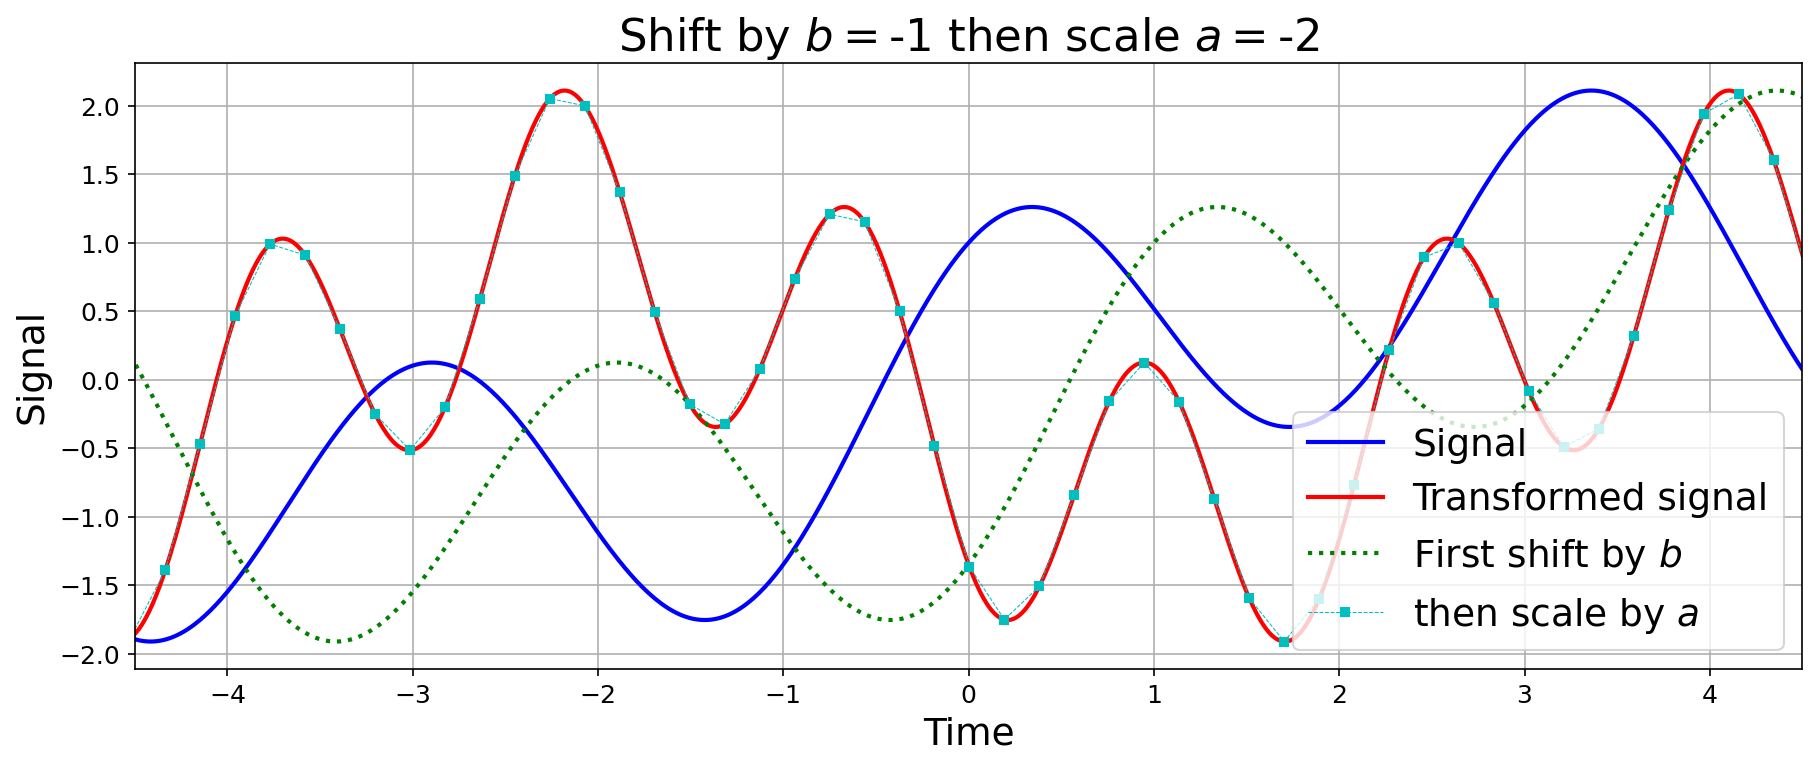

In [13]:
#define some transform parameters t -> a*t+b
a = -2 # time scaling
b = -1 # time shift
shift_and_plot(e, a, b)

**Note**: Shift right first, then scale down and flip. 

## Important Future Case ($t \to 2-t$)

-sin(0.5*t - 1.0) - 0.5*sin(2*t - 4) + cos(2*t - 4)


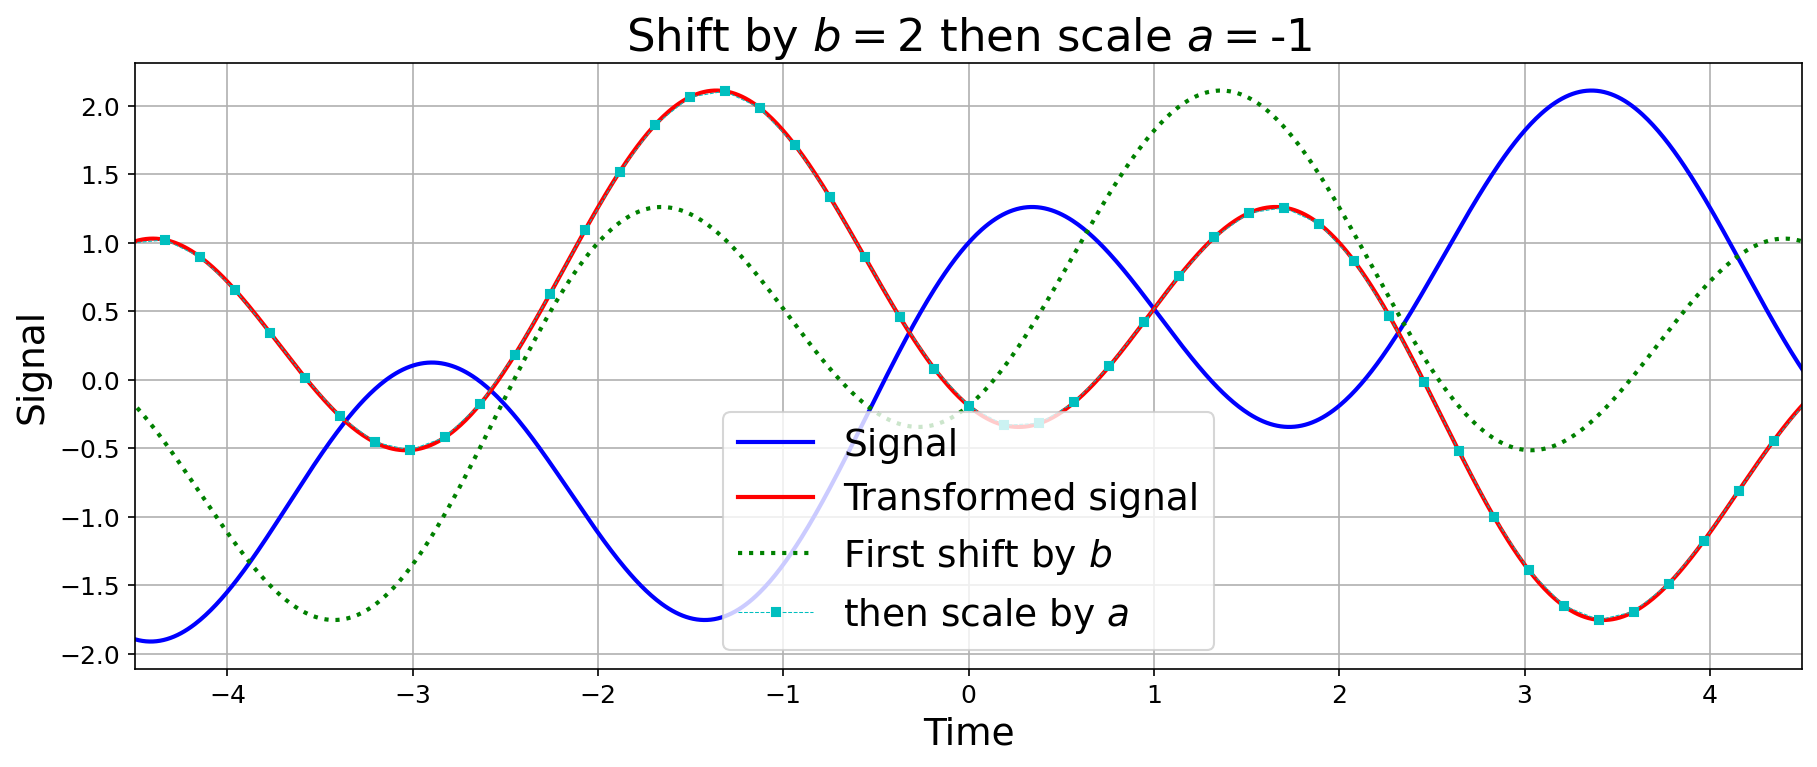

In [14]:
#define some transform parameters t -> a*t+b
a = -1 # time scaling
b = 2 # time shift
# function to scale
shift_and_plot(e, a, b)